In [1]:
import sys
!{sys.executable} -m pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
print(sys.executable)
print(sys.version)

C:\ProgramData\anaconda3\python.exe
3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


In [4]:
import mysql.connector
print("OK")

OK


In [5]:
import sys
!{sys.executable} -m pip install pymysql sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [1]:
###### task 3

import pandas as pd

df = pd.read_csv("market_data2.csv")

df.shape

(742, 42)

In [5]:
df.columns

Index(['ID', 'Job_Title', 'Salary_Estimate', 'FIELD4', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Lower_Salary', 'Upper_Salary',
       'Avg_SalaryK', 'company_txt', 'Job_Location', 'Age', 'Python', 'spark',
       'aws', 'excel', 'sql_', 'sas', 'keras', 'pytorch', 'scikit', 'tensor',
       'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [6]:
df['State'] = df['Location'].str.split(',').str[-1].str.strip()

df[['Location','State']].head()

,Location,State
0,"Albuquerque, NM",NM
1,"Linthicum, MD",MD
2,"Clearwater, FL",FL
3,"Richland, WA",WA
4,"New York, NY",NY


In [7]:
salary_state = df.groupby('State')['Avg_SalaryK'].mean()
salary_state_sorted = salary_state.sort_values(ascending=False)

salary_state_sorted.head(10)

State
CA    123.513158
IL    116.662500
DC    110.181818
MA    107.495146
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: Avg_SalaryK, dtype: float64

In [8]:
print(df[['Lower_Salary','Upper_Salary','Avg_SalaryK','State']].head())

   Lower_Salary  Upper_Salary  Avg_SalaryK State
0            53            91         72.0    NM
1            63           112         87.5    MD
2            80            90         85.0    FL
3            56            97         76.5    WA
4            86           143        114.5    NY


In [9]:
salary_state = df.groupby('State').agg({
    'Lower_Salary':'mean',
    'Upper_Salary':'mean',
    'Avg_SalaryK':'mean'
})

salary_state_sorted = salary_state.sort_values(by='Avg_SalaryK', ascending=False)

salary_state_sorted.head(10)

,Lower_Salary,Upper_Salary,Avg_SalaryK
State,,,
CA,92.427632,154.598684,123.513158
IL,88.350000,144.975000,116.662500
DC,88.636364,131.727273,110.181818
MA,78.689320,136.300971,107.495146
NJ,76.823529,132.294118,104.558824
MI,77.000000,123.500000,100.250000
RI,74.000000,126.000000,100.000000
NY,72.125000,125.180556,98.652778
NC,69.047619,127.857143,98.452381


<Axes: xlabel='State'>

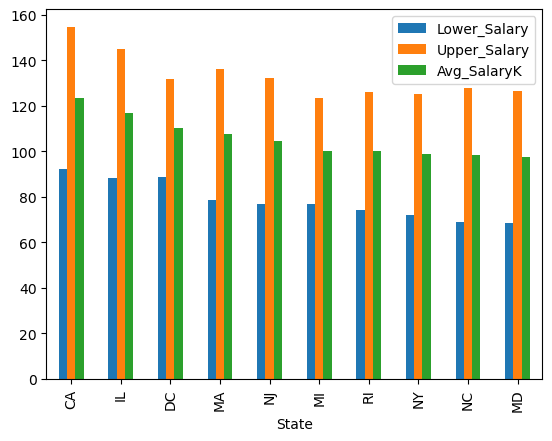

In [19]:
salary_state_sorted.head(10).plot(kind='bar')

In [16]:
####### task 4

df[['State','Avg_SalaryK']].head()

,State,Avg_SalaryK
0,NM,72.0
1,MD,87.5
2,FL,85.0
3,WA,76.5
4,NY,114.5


In [17]:
avg_salary_state = df.groupby('State')['Avg_SalaryK'].mean()

avg_salary_state_sorted = avg_salary_state.sort_values(ascending=False)

avg_salary_state_sorted.head(10)

State
CA    123.513158
IL    116.662500
DC    110.181818
MA    107.495146
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: Avg_SalaryK, dtype: float64

<Axes: xlabel='State'>

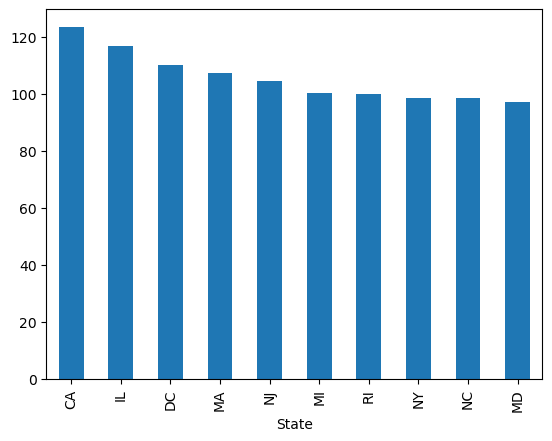

In [18]:
avg_salary_state_sorted.head(10).plot(kind='bar')

In [20]:
###### task 5

df['Industry'].value_counts().head()

Industry
Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: count, dtype: int64

In [21]:
top_industries = df['Industry'].value_counts().head(5)

top_industries

Industry
Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: count, dtype: int64

<Axes: xlabel='Industry'>

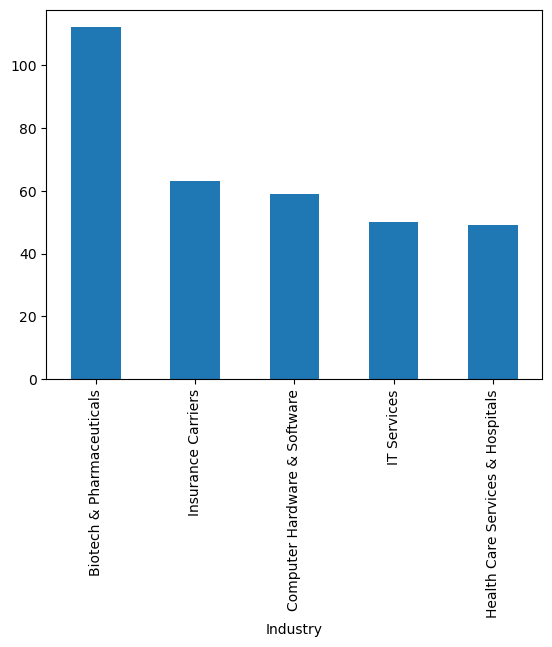

In [22]:
top_industries.plot(kind='bar')

In [33]:
########### task 6

df['Company_Name']=df['Company_Name'].str.replace(r'\r\n.+','',regex=True)

In [38]:
df['Company_Name'].value_counts().head()

Company_Name
MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    11
PNNL                              10
Name: count, dtype: int64

In [34]:
top_companies=df['Company_Name'].value_counts().head(10)
top_companies

Company_Name
MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    11
PNNL                              10
Liberty Mutual Insurance          10
AstraZeneca                        9
MITRE                              8
Novartis                           7
Pfizer                             7
Name: count, dtype: int64

<Axes: xlabel='Company_Name'>

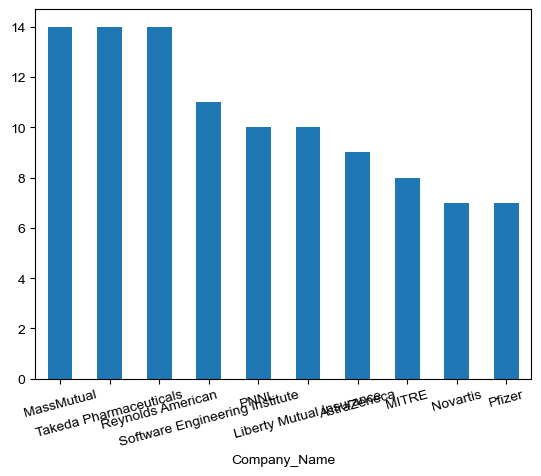

In [37]:
top_companies.plot(kind='bar',rot=15)

In [3]:
######### task 7

df['Job_Title'].value_counts().head()

Job_Title
Data Scientist           131
Data Engineer             53
Senior Data Scientist     34
Data Analyst              15
Senior Data Engineer      14
Name: count, dtype: int64

In [4]:
top_titles = df['Job_Title'].value_counts().head(10)

top_titles

Job_Title
Data Scientist               131
Data Engineer                 53
Senior Data Scientist         34
Data Analyst                  15
Senior Data Engineer          14
Senior Data Analyst           12
Lead Data Scientist            8
Sr. Data Engineer              6
Marketing Data Analyst         6
Machine Learning Engineer      5
Name: count, dtype: int64

<Axes: xlabel='Job_Title'>

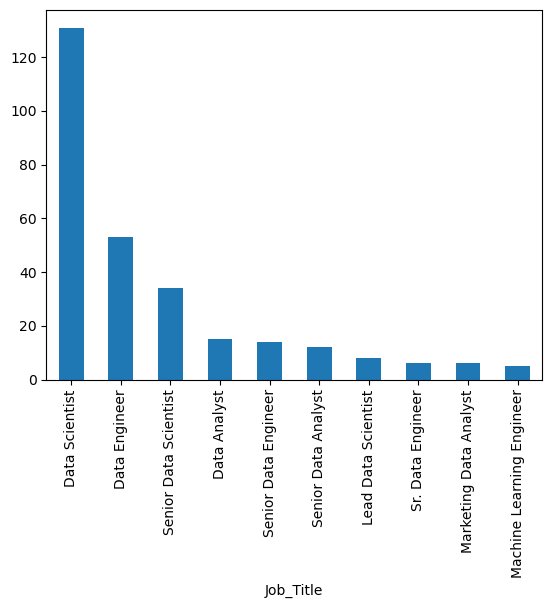

In [5]:
top_titles.plot(kind='bar')

In [21]:
############### task 8

top_titles = df['Job_Title'].value_counts().head(10)
top_titles.index

Index(['Data Scientist', 'Data Engineer', 'Senior Data Scientist',
       'Data Analyst', 'Senior Data Engineer', 'Senior Data Analyst',
       'Lead Data Scientist', 'Sr. Data Engineer', 'Marketing Data Analyst',
       'Machine Learning Engineer'],
      dtype='object', name='Job_Title')

In [22]:
top_titles_list = top_titles.index.tolist()

salary_by_title = df[df['Job_Title'].isin(top_titles_list)] \
    .groupby('Job_Title')['Avg_SalaryK'].mean() \
    .sort_values(ascending=False)

salary_by_title

Job_Title
Lead Data Scientist          161.250000
Senior Data Scientist        134.867647
Senior Data Engineer         121.928571
Sr. Data Engineer            115.000000
Data Scientist               106.179389
Machine Learning Engineer    104.900000
Data Engineer                 91.660377
Senior Data Analyst           83.416667
Data Analyst                  66.300000
Marketing Data Analyst        48.666667
Name: Avg_SalaryK, dtype: float64

<Axes: xlabel='Job_Title'>

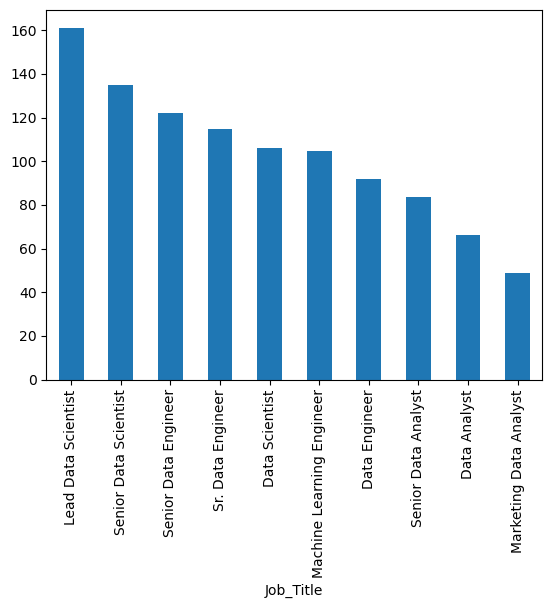

In [23]:
salary_by_title.plot(kind='bar')

In [24]:
############# task 9 

skill_cols = ['Python','spark','aws','excel','sql_','sas','keras','pytorch',
              'scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']

skill_cols

['Python',
 'spark',
 'aws',
 'excel',
 'sql_',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an']

In [25]:
top_titles = df['Job_Title'].value_counts().head(5)
top_titles_list = top_titles.index.tolist()

top_titles_list

['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Data Analyst',
 'Senior Data Engineer']

In [26]:
skill_by_title = df[df['Job_Title'].isin(top_titles_list)] \
    .groupby('Job_Title')[skill_cols].mean()

skill_by_title

,Python,spark,aws,excel,sql_,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job_Title,,,,,,,,,,,,,,,,
Data Analyst,0.400000,0.066667,0.133333,1.000000,0.733333,0.000000,0.000000,0.00000,0.000000,0.000000,0.066667,0.466667,0.266667,0.000000,0.066667,0.000000
Data Engineer,0.735849,0.566038,0.471698,0.490566,0.735849,0.000000,0.000000,0.00000,0.000000,0.000000,0.358491,0.075472,0.037736,0.018868,0.075472,0.000000
Data Scientist,0.832061,0.335878,0.244275,0.541985,0.679389,0.145038,0.122137,0.10687,0.152672,0.229008,0.198473,0.274809,0.076336,0.015267,0.061069,0.022901
Senior Data Engineer,0.642857,0.571429,0.714286,0.285714,0.571429,0.000000,0.000000,0.00000,0.000000,0.142857,0.500000,0.000000,0.000000,0.214286,0.000000,0.000000
Senior Data Scientist,0.852941,0.323529,0.323529,0.588235,0.588235,0.147059,0.029412,0.00000,0.176471,0.147059,0.205882,0.352941,0.235294,0.058824,0.029412,0.000000


<Axes: >

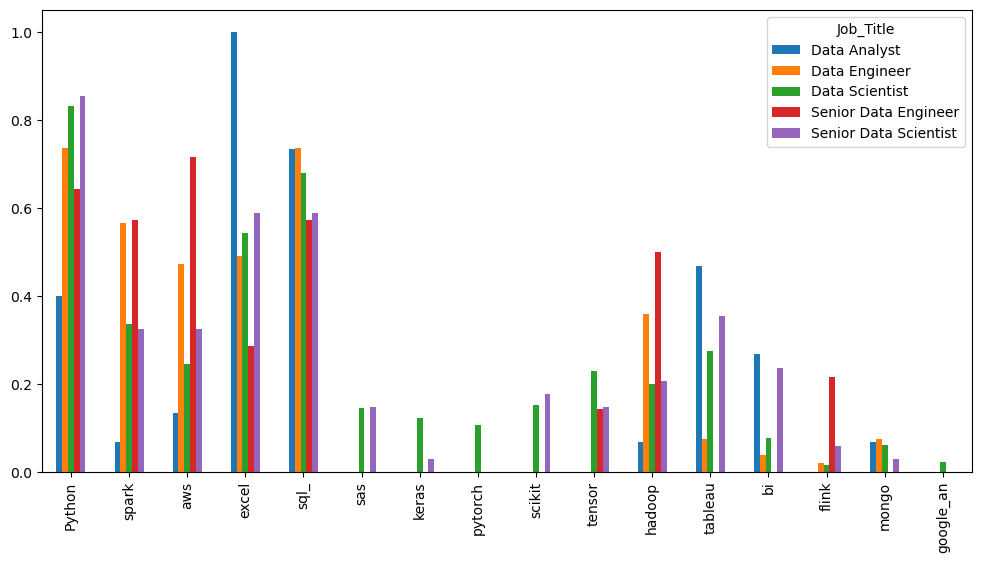

In [27]:
skill_by_title.T.plot(kind='bar', figsize=(12,6))

In [2]:
########### task 10
df['Degree'].value_counts()

Degree
na    383
M     252
P     107
Name: count, dtype: int64

In [3]:
salary_by_degree = df.groupby('Degree')['Avg_SalaryK'].mean()

salary_by_degree

Degree
M     105.634921
P     115.981308
na     94.703655
Name: Avg_SalaryK, dtype: float64

<Axes: xlabel='Degree'>

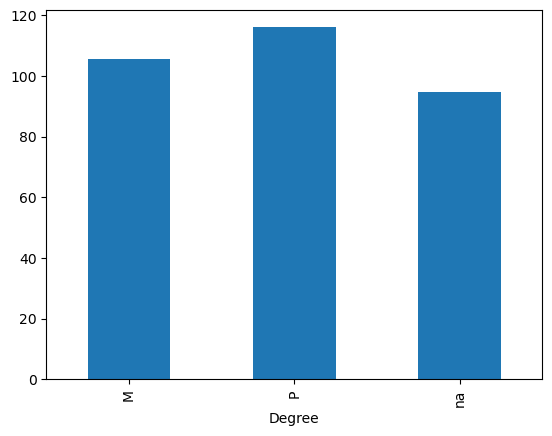

In [4]:
salary_by_degree.plot(kind='bar')

In [5]:
############## task 11
df.describe()

,ID,FIELD4,Rating,Founded,Hourly,Employer_provided,Lower_Salary,Upper_Salary,Avg_SalaryK,Age,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,0.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,NaN,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,NaN,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,NaN,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,NaN,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,NaN,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,NaN,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,NaN,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
